In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

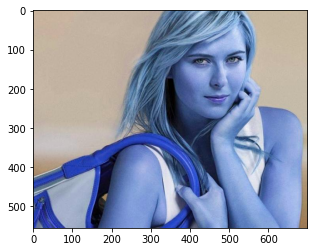

In [3]:
plt.imshow(img)

In [4]:
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [5]:
rgb.shape

(555, 700, 3)

In [6]:
rgb

array([[[157, 179, 200],
        [157, 179, 200],
        [157, 179, 200],
        ...,
        [158, 181, 195],
        [157, 180, 194],
        [156, 179, 193]],

       [[157, 179, 200],
        [157, 179, 200],
        [157, 179, 200],
        ...,
        [159, 182, 196],
        [157, 180, 194],
        [156, 179, 193]],

       [[157, 179, 200],
        [157, 179, 200],
        [157, 179, 200],
        ...,
        [159, 182, 196],
        [158, 181, 195],
        [156, 179, 193]],

       ...,

       [[158,  58,  26],
        [163,  59,  30],
        [165,  59,  33],
        ...,
        [ 84, 120, 154],
        [ 84, 120, 154],
        [ 84, 120, 154]],

       [[162,  62,  30],
        [165,  61,  32],
        [167,  61,  35],
        ...,
        [ 84, 120, 154],
        [ 84, 120, 154],
        [ 84, 120, 154]],

       [[167,  67,  35],
        [167,  63,  34],
        [168,  62,  36],
        ...,
        [ 83, 119, 153],
        [ 83, 119, 153],
        [ 83, 119, 153]]

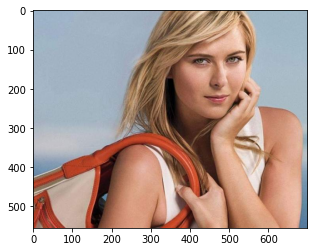

In [7]:
plt.imshow(rgb, cmap='gray')

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [9]:
gray.shape

(555, 700)

In [10]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

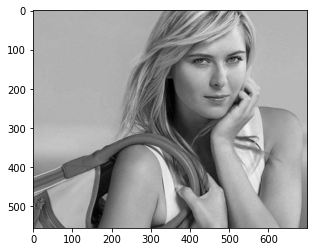

In [11]:
plt.imshow(gray, cmap='gray')

### haar cascade using for the making and recognizeing the face

In [12]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [13]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [14]:
faces

array([[352,  38, 233, 233]])

In [15]:
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

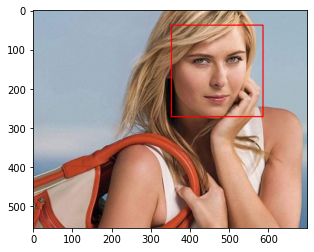

In [16]:
face_img = cv2.rectangle(rgb,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

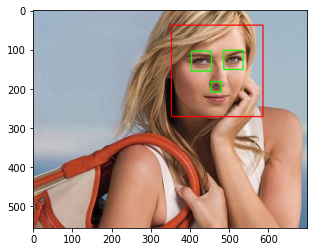

In [17]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(rgb,(x,y),(x+w,y+h),(255,0,0),2)
    roi_rgb = rgb[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_rgb)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew, ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

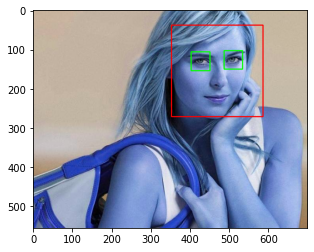

In [18]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew, ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

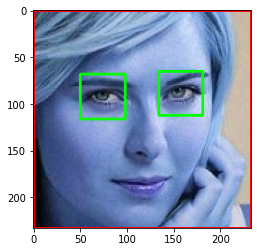

In [19]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

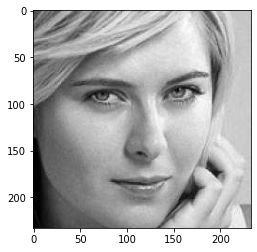

In [20]:
%matplotlib inline
plt.imshow(roi_gray,cmap='gray')

In [21]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

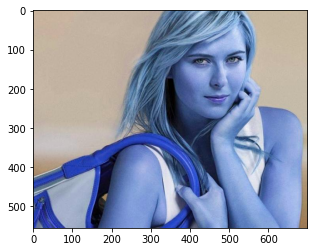

In [22]:
original_image = cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(original_image)

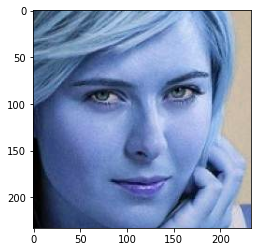

In [23]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

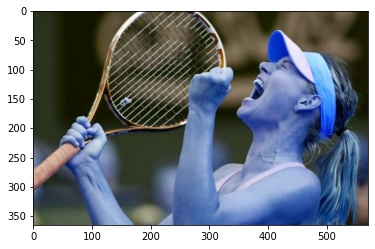

In [24]:
org_image_obstructed = cv2.imread('./test_images/sharapova2.JPG')
plt.imshow(org_image_obstructed)

In [28]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [29]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [30]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [31]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

{
    'lionel_messi': [
        './dataset/cropped/messi/messi1.png',
        './dataset/cropped/messi/messi2.png'
    ],
    'virat_kohli:' [
        './dataset/cropped/kohli/kohli1.png',
        './dataset/cropped/kohli/kohli2.png'
    ]
}

In [32]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            
            count += 1

cropped
lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [33]:
import numpy as np
import pywt
import cv2

def w2d(img, mode = 'haar', level=1):
    imArray = img
    # Datatype conversions
    # Convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    # Convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    # compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    #Process Coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    # reconstruction
    
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

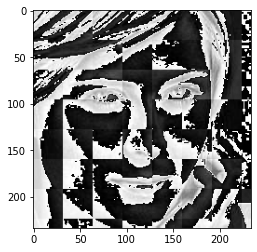

In [34]:
im_har = w2d(cropped_image, 'db1',5)
plt.imshow(im_har, cmap='gray')

In [35]:
celebrity_file_names_dict

{'cropped': [],
 'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi1.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi4.png',
  './dataset/cropped/lionel_messi/lionel_messi5.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi9.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi13.png',
  './dataset/cropped/lionel_messi/lionel_messi14.png',
  './dataset/cropped/lionel_messi/lionel_messi15.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_m

In [36]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

In [37]:
x = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        im_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(im_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])
        

In [38]:
32*32*3 + 32*32

4096

In [39]:
x[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [40]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(165, 4096)

In [41]:
x[0]

array([100., 129., 140., ..., 237., 234., 232.])

In [42]:
y[0]

1

### Data cleaning process is done. Now we are ready to train our model

We will use SVM with rbf kernel tuned with heuristic finetuning

In [43]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()),('svc',SVC(kernel='rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)

0.7857142857142857

In [45]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      0.62      0.77         8
           2       1.00      0.70      0.82        10
           3       0.50      1.00      0.67         7
           4       0.75      0.60      0.67         5
           5       0.92      0.92      0.92        12

    accuracy                           0.79        42
   macro avg       0.83      0.77      0.77        42
weighted avg       0.86      0.79      0.79        42



<h3> Let's use GridSearch to try out different models with different paramets. Goal is to come up with best model with best fine tuned parameters</h3>

In [53]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn import sys
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [59]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [60]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.861333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.716667,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.894000,{'logisticregression__C': 1}


In [61]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [64]:
best_estimators['svm'].score(X_test,y_test)

0.8333333333333334

In [66]:
best_estimators['random_forest'].score(X_test,y_test)

0.6904761904761905

In [68]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8333333333333334

In [69]:
best_clf = best_estimators['svm']

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  0,  0,  2,  0],
       [ 0,  8,  1,  1,  0],
       [ 0,  0,  7,  0,  0],
       [ 0,  0,  1,  3,  1],
       [ 0,  0,  1,  0, 11]], dtype=int64)

Text(69.0, 0.5, 'Truth')

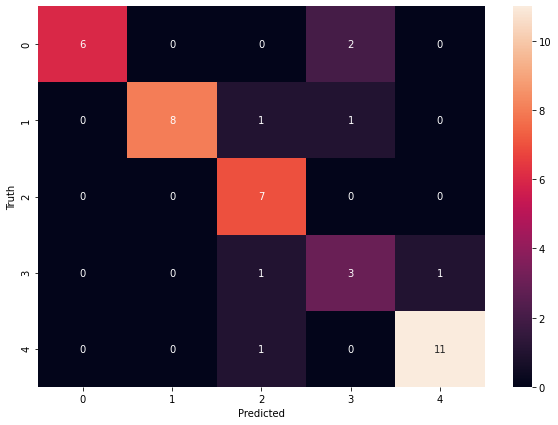

In [72]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [73]:
class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

### Save the trained model

In [75]:
import joblib

# save the model as a pickle in a file
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

## Save class dictionary

In [76]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))